In [1]:
import datetime
import pytz

import torch
from torch.utils.tensorboard import SummaryWriter
from torchvision.datasets import MNIST
from torchvision.transforms import Compose, ToTensor, RandomRotation, RandomAffine
from tqdm.notebook import tqdm

from vit import VIT

In [2]:
def get_model():
    model = VIT(
        shape=(1, 28, 28),
        n_patches_w=7,
        n_patches_h=7,
        hidden_dim=48,
        out_dim=10,
        n_blocks=4,
        n_heads=2,
        encoder_mlp_ratio=4,
    )
    return model

In [4]:
def train(model, train_data, val_data, n_epochs, batch_size):
    writer = SummaryWriter('runs/vit_mnist_{}'.format(datetime.datetime.now(pytz.timezone('Asia/Kolkata')).strftime('%Y-%m-%d_%H-%M-%S')))
    cuda_available = torch.cuda.is_available()
    print(f"CUDA available: {cuda_available}")
    if cuda_available:
        model = model.cuda()
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    total_train = len(train_data) 
    total_train = 10000 // batch_size
    for epoch in range(n_epochs):
        model.train()
        for i, (x, y) in tqdm(
            enumerate(train_data), total=total_train+1, desc=f"Epoch {epoch}"
        ):
            if i > total_train:
                break
            optimizer.zero_grad()
            y_hat = model(x.cuda() if cuda_available else x)
            loss = criterion(y_hat, y.cuda() if cuda_available else y)
            loss.backward()
            optimizer.step()
            writer.add_scalar("Loss/train", loss, epoch * len(train_data) + i)
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for x, y in tqdm(val_data, desc=f"Validation {epoch}", total=len(val_data)):
                if cuda_available:
                    x, y = x.cuda(), y.cuda()
                y_hat = model(x)
                _, predicted = torch.max(y_hat.data, 1)
                total += y.size(0)
                correct += (predicted == y).sum().item()
        accuracy = correct / total
        writer.add_scalar("Accuracy/val", accuracy, epoch)
        print(f"Epoch {epoch}, accuracy {accuracy}")
    writer.flush()
    return model

In [5]:
model = get_model()

d:\vsc\transformers_tutorial\vit\vit.py:177: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(


In [5]:
batch_size = 384
n_epochs = 10

transform = Compose([ToTensor(), RandomRotation(20), RandomAffine(10)])
train_data = torch.utils.data.DataLoader(
    MNIST(root="./data", train=True, download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True,
)
val_data = torch.utils.data.DataLoader(
    MNIST(root="./data", train=False, download=True, transform=transform),
    batch_size=batch_size,
    shuffle=False,
)
model = train(model, train_data, val_data, n_epochs, batch_size=batch_size)

CUDA available: True


Epoch 0:   0%|          | 0/27 [00:00<?, ?it/s]

Validation 0:   0%|          | 0/27 [00:00<?, ?it/s]

Epoch 0, accuracy 0.7793


Epoch 1:   0%|          | 0/27 [00:00<?, ?it/s]

Validation 1:   0%|          | 0/27 [00:00<?, ?it/s]

Epoch 1, accuracy 0.8068


Epoch 2:   0%|          | 0/27 [00:00<?, ?it/s]

Validation 2:   0%|          | 0/27 [00:00<?, ?it/s]

Epoch 2, accuracy 0.8177


Epoch 3:   0%|          | 0/27 [00:00<?, ?it/s]

Validation 3:   0%|          | 0/27 [00:00<?, ?it/s]

Epoch 3, accuracy 0.8281


Epoch 4:   0%|          | 0/27 [00:00<?, ?it/s]

Validation 4:   0%|          | 0/27 [00:00<?, ?it/s]

Epoch 4, accuracy 0.8448


Epoch 5:   0%|          | 0/27 [00:00<?, ?it/s]

Validation 5:   0%|          | 0/27 [00:00<?, ?it/s]

Epoch 5, accuracy 0.832


Epoch 6:   0%|          | 0/27 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [6]:
batch_size = 384
n_epochs = 10

transform = Compose([ToTensor(), RandomRotation(20), RandomAffine(10)])
train_data = torch.utils.data.DataLoader(
    MNIST(root="./data", train=True, download=True, transform=transform),
    batch_size=batch_size,
    shuffle=True,
)

In [7]:
for x, y in train_data:
    print(x.shape, y.shape)
    break

torch.Size([384, 1, 28, 28]) torch.Size([384])


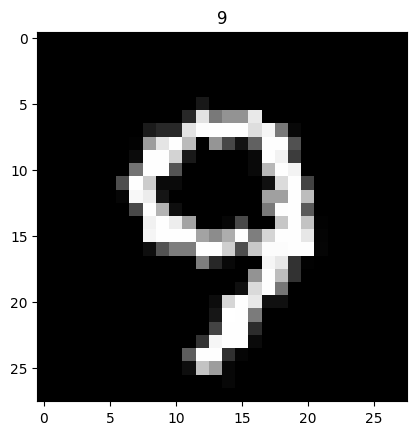

In [16]:
import matplotlib.pyplot as plt

idx = 380
plt.imshow(x[idx].squeeze(), cmap="gray")
plt.title(y[idx].item())
plt.show()